In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor,RandomForestClassifier
from xgboost import XGBRegressor
from sklearn import ensemble
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
Top200 = pd.read_csv('./CitiBikeData/Top200_Stations.csv',index_col=0)

/Users/hanboshao/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
Top200.head()

,start_station_latitude,start_station_longitude,start_hour,start_year,start_month,start_day,start_dayofweek,start_station_checkout_counts,start_station_checkin_counts,AWND,...,Haze,TAVG,HasPRCP,HasSNOW,tot_docks,Percent_usage,Isweekday,holidays,Commute,cluster
0,40.751873,-73.977706,18,2017,1,19,4,92.0,72.0,3.58,...,0.0,44.0,0,0,61.0,2.688525,1,0,1,1.0
2,40.722174,-73.983688,8,2017,1,4,3,17.0,3.0,8.05,...,1.0,43.0,0,0,37.0,0.540541,1,0,1,2.0
3,40.732233,-73.988900,20,2017,1,13,5,6.0,4.0,7.16,...,0.0,47.0,0,0,35.0,0.285714,1,0,0,2.0
4,40.755942,-74.002116,18,2017,1,25,3,8.0,3.0,6.71,...,0.0,43.5,0,0,39.0,0.282051,1,0,1,2.0
5,40.730473,-73.986724,6,2017,1,25,3,5.0,1.0,6.71,...,0.0,43.5,0,0,39.0,0.153846,1,0,0,2.0


## Lasso Model 

In [4]:
# X = Top200.drop('start_station_checkout_counts',axis = 1)
# Y = Top200.start_station_checkout_counts

In [5]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

In [6]:
# lasso = Lasso(normalize=True,tol=0.01)
# alphas = np.logspace(-8,-2,100)

# alpha_coefs = []
# for alpha in alphas:
#     lasso.set_params(alpha=alpha)
#     lasso.fit(X, Y)
#     alpha_coefs.append(lasso.coef_)
    
# # the order of predictors to become zero coefficient
# coefs_df = pd.DataFrame(alpha_coefs, index=alphas, columns = list(X.columns))

In [7]:
# plt.figure(figsize=(20,10))
# for name in coefs_df.columns:
#     plt.plot(coefs_df.index, coefs_df[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')
# plt.legend(loc=1)   

In [8]:
# ### find the alpha where coefficient becomes zero ###
# alpha_zero = {}
# for col in coefs_df.columns:
#     for alpha in coefs_df.index:
#         if coefs_df.loc[alpha, col] == 0:
#             alpha_zero[col] = alpha
#             break
# alpha_zero = sorted(alpha_zero.items(), key=lambda x: x[1], reverse=True)
# alpha_zero

## Tree Based Models

In [8]:
X = Top200.drop(['start_station_checkout_counts','Percent_usage','start_station_checkin_counts'],axis = 1)
Y = Top200.start_station_checkout_counts

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=42)

### XGBoost

In [6]:
xgb = XGBRegressor()
xgb.set_params(subsample=0.7,random_state=42, n_estimators=1400,eta=x0.1,verbose=1,n_jobs=6)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, eta=0.1, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1400, n_jobs=6, num_parallel_tree=None,
             objective='reg:squarederror', random_state=42, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=0.7,
             tree_method=None, validate_parameters=False, verbose=1,
             verbosity=None)

In [7]:
%time xgb.fit(X_train,y_train)

Wall time: 20min 53s


XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.100000001, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=1400, n_jobs=6, num_parallel_tree=1,
             objective='reg:squarederror', random_state=42, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7, tree_method=None,
             validate_parameters=False, verbose=1, verbosity=None)

In [8]:
print('Training score is %.3f' %(xgb.score(X_train,y_train)))
print('Testing score is %.3f' %(xgb.score(X_test,y_test)))

Training score is 0.771
Testing score is 0.748


In [9]:
sorted_importance_xgb = sorted(zip(X_train.columns.values, xgb.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_xgb

[('cluster', 0.2750777),
 ('Commute', 0.20732637),
 ('TAVG', 0.06581265),
 ('tot_docks', 0.059229013),
 ('start_hour', 0.054961402),
 ('TMAX', 0.054774337),
 ('start_station_latitude', 0.042596813),
 ('start_dayofweek', 0.0371454),
 ('start_station_longitude', 0.035590254),
 ('PRCP', 0.023238897),
 ('start_month', 0.021832677),
 ('start_year', 0.021341192),
 ('holidays', 0.021280931),
 ('TMIN', 0.015480092),
 ('Heavy_Fog', 0.009845315),
 ('SNWD', 0.008833904),
 ('start_day', 0.008224535),
 ('Thunder', 0.008054789),
 ('Haze', 0.007094753),
 ('Fog', 0.007060368),
 ('AWND', 0.006987707),
 ('SNOW', 0.0052127233),
 ('Glaze', 0.002998172),
 ('Hail', 0.0),
 ('HasPRCP', 0.0),
 ('HasSNOW', 0.0),
 ('Isweekday', 0.0)]

Text(0.5, 1.0, 'Feature Importance Plot for XgBoost Model')

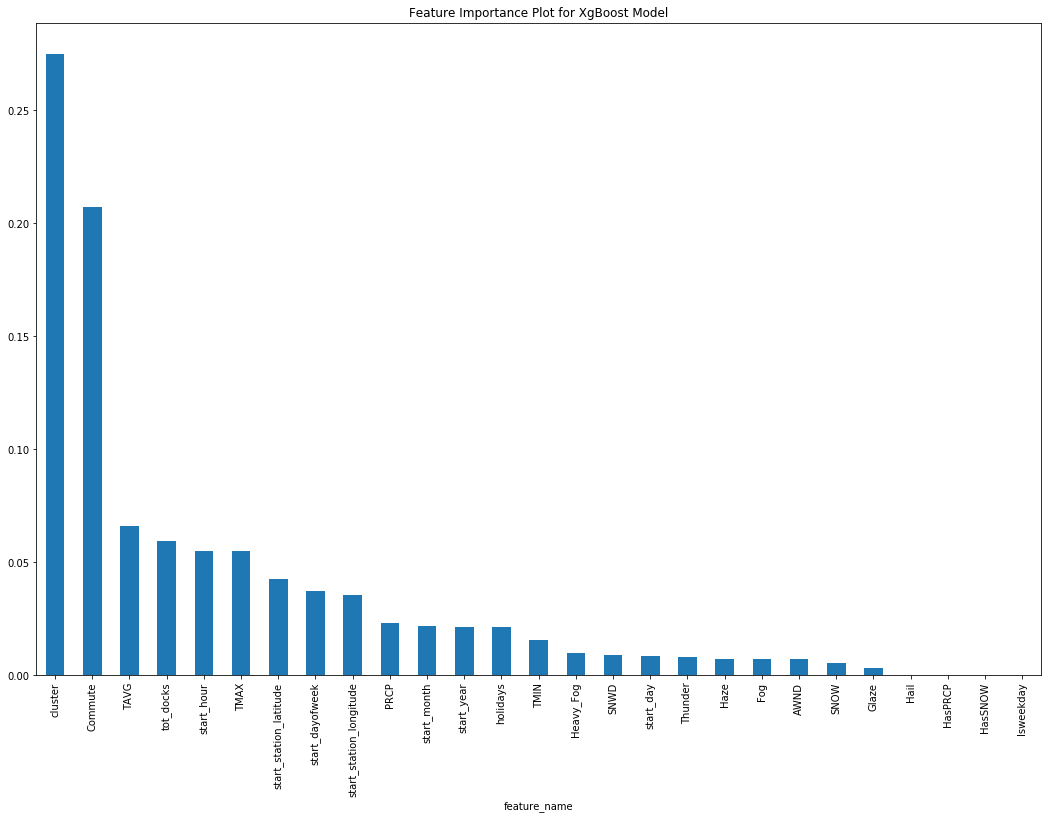

In [10]:
plt.rcParams['figure.figsize'] = (18,12)
a, b = zip(*sorted_importance_xgb) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot for XgBoost Model')

In [ ]:
# grid_params = {'max_depth': range(4,8,3),
#                'eta':np.linspace(0.02,0.1,5)}
# grid_search_xgb = GridSearchCV(xgb, grid_params, cv = 3)
# %time grid_search_xgb.fit(X_train,y_train)

In [ ]:
# grid_search_xgb.best_params_

In [ ]:
# grid_search_xgb.score(X_train,y_train)

In [ ]:
# grid_search_xgb.score(X_test,y_test)

### XGBoost Model For Cluster 0

In [89]:
X_0 = Top200.loc[Top200.cluster==1].drop(['start_station_checkout_counts','Percent_usage','start_station_checkin_counts','cluster'],axis = 1)
Y_0 = Top200.loc[Top200.cluster==1].start_station_checkout_counts

In [90]:
X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, Y_0, train_size=0.8, test_size=0.2, random_state=42)

In [100]:
xgb_0 = XGBRegressor()
xgb_0.set_params(subsample=0.9,random_state=42, n_estimators=1400,eta=0.08,verbose=1,n_jobs=6)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, eta=0.08, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1400, n_jobs=6, num_parallel_tree=None,
             objective='reg:squarederror', random_state=42, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=0.9,
             tree_method=None, validate_parameters=False, verbose=1,
             verbosity=None)

In [ ]:
%time xgb_0.fit(X_train_0,y_train_0)

In [ ]:
print('Training score is %.3f' %(xgb_0.score(X_train_0,y_train_0)))
print('Testing score is %.3f' %(xgb_0.score(X_test_0,y_test_0)))

In [6]:
gbm = GradientBoostingRegressor()
gbm.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

### Gradient Boosting

In [30]:
gbm = GradientBoostingRegressor()
gbm.set_params(learning_rate=0.03, n_estimators=2000, subsample=0.7, loss='ls', max_depth=3,\
               min_impurity_decrease=0,random_state = 42,verbose=1, warm_start = True)
%time gbm.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         144.3431           2.2619           60.62m
         2         143.8137           2.1379           60.75m
         3         140.6961           2.0199           61.26m
         4         139.5962           1.8998           58.57m
         5         137.1697           1.7908           56.66m
         6         136.0706           1.7058           55.26m
         7         134.1557           1.6109           54.13m
         8         132.0454           1.5277           53.17m
         9         130.7904           1.4300           52.45m
        10         129.4398           1.3535           51.85m
        20         118.6394           0.8111           48.69m
        30         112.5186           0.5210           47.85m
        40         108.2427           0.3971           47.22m
        50         104.2766           0.2849           46.68m
        60         101.8904           0.2009           46.02m
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=True)

In [31]:
print('Training score is %.3f' %gbm.score(X_train,y_train))
print('Testing score is %.3f' %gbm.score(X_test,y_test))

Training score is 0.567
Testing score is 0.562


In [32]:
gbm1 = GradientBoostingRegressor()
gbm1.set_params(learning_rate=0.02, n_estimators=3000, subsample=0.7, loss='ls', max_depth=3,\
               min_impurity_decrease=0.0001,random_state = 42,verbose=1, warm_start = True)
%time gbm1.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         145.0877           1.5155           73.59m
         2         145.2458           1.4594           73.52m
         3         142.7284           1.4083           73.24m
         4         142.1977           1.3478           73.12m
         5         140.2539           1.2954           73.28m
         6         139.6042           1.2573           73.34m
         7         138.0851           1.2078           73.19m
         8         136.3322           1.1678           73.07m
         9         135.4141           1.1147           72.98m
        10         134.3518           1.0764           72.91m
        20         124.9366           0.7516           72.63m
        30         119.0101           0.5413           71.09m
        40         114.6598           0.3956           70.63m
        50         110.7529           0.3008           70.25m
        60         108.4281           0.2493           70.01m
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.02, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0001, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=True)

In [33]:
print('Training score is %.3f' %gbm1.score(X_train,y_train))
print('Testing score is %.3f' %gbm1.score(X_test,y_test))

Training score is 0.566
Testing score is 0.561


In [34]:
gbm2 = GradientBoostingRegressor()
gbm2.set_params(learning_rate=0.005, n_estimators=3000, subsample=0.7, loss='ls', max_depth=4,\
               min_impurity_decrease=0.0001,random_state = 42,verbose=1, warm_start = True)
%time gbm2.fit(X_train,y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1         146.1426           0.4572          116.87m
         2         147.3182           0.4494          116.55m
         3         145.7627           0.4340          116.70m
         4         146.1785           0.4252          116.40m
         5         145.0744           0.4417          116.20m
         6         145.2574           0.4203          116.11m
         7         144.5214           0.4142          115.94m
         8         143.4996           0.4316          115.72m
         9         143.3283           0.4052          115.64m
        10         142.9486           0.4011          115.65m
        20         138.3916           0.3825          114.93m
        30         135.0942           0.3437          114.41m
        40         132.0941           0.3048          113.94m
        50         128.7360           0.2878          112.69m
        60         126.4819           0.2666          111.58m
       

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.005, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0001, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='auto',
                          random_state=42, subsample=0.7, tol=0.0001,
                          validation_fraction=0.1, verbose=1, warm_start=True)

In [35]:
print('Training score is %.3f' %gbm2.score(X_train,y_train))
print('Testing score is %.3f' %gbm2.score(X_test,y_test))

Training score is 0.541
Testing score is 0.537


In [12]:
sorted_importance_gbm = sorted(zip(X_train.columns.values, gbm.feature_importances_), key=lambda t:t[1], reverse=True)
sorted_importance_gbm

[('Commute', 0.26825613206940657),
 ('cluster', 0.1795607632877984),
 ('start_hour', 0.14908494882764836),
 ('tot_docks', 0.11583994096117621),
 ('TAVG', 0.060181861711634685),
 ('TMAX', 0.057174477478400626),
 ('start_station_longitude', 0.04932132027397852),
 ('start_station_latitude', 0.03138756226431521),
 ('start_dayofweek', 0.025011368927366173),
 ('start_month', 0.016329407758114527),
 ('PRCP', 0.014005190584336588),
 ('Isweekday', 0.013857576534539413),
 ('TMIN', 0.007919599596420378),
 ('start_year', 0.007426515637171531),
 ('holidays', 0.0018061323232075603),
 ('HasPRCP', 0.0016327723504830321),
 ('start_day', 0.0005828133730857093),
 ('AWND', 0.0003071205113413932),
 ('SNWD', 0.00018445382387227192),
 ('Fog', 7.36858302435516e-05),
 ('Thunder', 3.2056645658874746e-05),
 ('Haze', 2.429922980030986e-05),
 ('SNOW', 0.0),
 ('Heavy_Fog', 0.0),
 ('Hail', 0.0),
 ('Glaze', 0.0),
 ('HasSNOW', 0.0)]

Text(0.5, 1.0, 'Feature Importance Plot for GBM model')

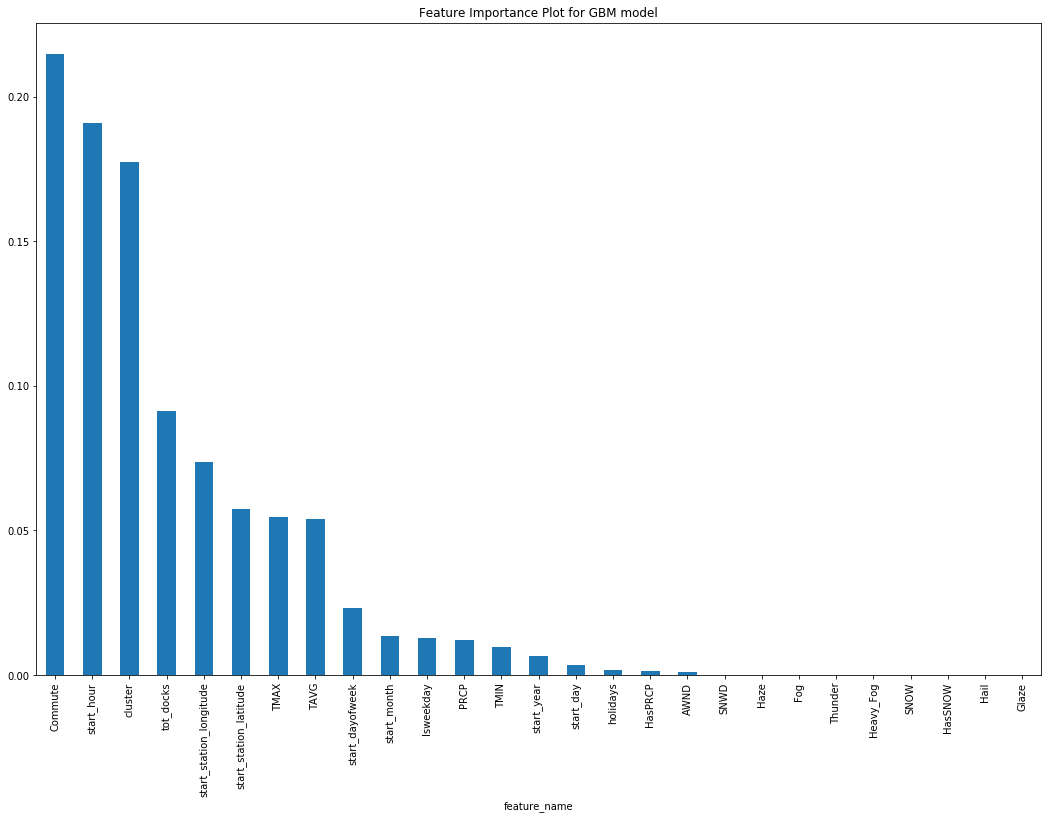

In [16]:
plt.rcParams['figure.figsize'] = (18,12)
a, b = zip(*sorted_importance_gbm) # this splits the list of tuples into two lists
pd.DataFrame({'feature_name':a, 'importance_score':b}).plot.bar(x='feature_name',y='importance_score', legend=None)
plt.title('Feature Importance Plot for GBM model')

In [ ]:
# grid_params = {'max_depth': range(4,8,3),
#                'learning_rate':np.linspace(0.02,0.12,3),
#               "min_samples_split": np.linspace(start=5, stop=20, num=4, dtype=int)}
# grid_search_gbm = GridSearchCV(gbm, grid_params, cv = 3)
# %time grid_search_gbm.fit(X_train,y_train)

In [ ]:
# grid_search_gbm.best_param_

## Classification on Turnover Rate

### Random Forest

In [17]:
Top200['High_turnover']=[1 if x>0.49 else 0 for x in Top200['Percent_usage']]

In [18]:
columns_to_drop = ['High_turnover', 'Percent_usage', 'start_station_checkout_counts', 'start_station_checkin_counts']
X_class = Top200.drop(columns_to_drop,axis = 1)
Y_class = Top200.High_turnover

In [19]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, Y_class, train_size=0.8, test_size=0.2, random_state=42)

In [20]:
randomForest = RandomForestClassifier()

In [21]:
randomForest.set_params(random_state=42, max_features=4,n_estimators=1000,verbose=1,n_jobs=6)
%time randomForest.fit(X_train_class, y_train_class)  

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:   41.0s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed: 11.5min


Wall time: 14min 26s


[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed: 14.4min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=6, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [22]:
print('RandomForest train test score is %.3f' %(randomForest.score(X_train_class, y_train_class)))
print('RandomForest test test score is %.3f' %(randomForest.score(X_test_class, y_test_class)))

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    5.9s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   31.1s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:  3.1min finished


RandomForest train test score is 1.000


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    3.1s
[Parallel(n_jobs=6)]: Done 188 tasks      | elapsed:   21.0s
[Parallel(n_jobs=6)]: Done 438 tasks      | elapsed:   47.4s
[Parallel(n_jobs=6)]: Done 788 tasks      | elapsed:  1.4min


RandomForest test test score is 0.822


[Parallel(n_jobs=6)]: Done 1000 out of 1000 | elapsed:  1.8min finished


In [23]:
feature_importance = list(zip(X_train_class.columns, randomForest.feature_importances_))
feature_importance

[('start_station_latitude', 0.13018842394154112),
 ('start_station_longitude', 0.12241860465118873),
 ('start_hour', 0.2365853624635061),
 ('start_year', 0.01147237981274158),
 ('start_month', 0.03003971615763106),
 ('start_day', 0.02723196396838411),
 ('start_dayofweek', 0.02018832566586693),
 ('AWND', 0.02600631719577908),
 ('PRCP', 0.0162942051068507),
 ('SNOW', 0.0008696608080090987),
 ('SNWD', 0.0015425076481109406),
 ('TMAX', 0.04697803712633777),
 ('TMIN', 0.044504637211141215),
 ('Fog', 0.0044694676078746946),
 ('Heavy_Fog', 0.0005751796282660648),
 ('Thunder', 0.0014158680310473015),
 ('Hail', 1.5910008094237393e-05),
 ('Glaze', 0.00011557690581712967),
 ('Haze', 0.0038516459631836517),
 ('TAVG', 0.05206044012683771),
 ('HasPRCP', 0.00399535058642092),
 ('HasSNOW', 0.0005204096637341101),
 ('tot_docks', 0.0959755029774302),
 ('Isweekday', 0.005537254297177431),
 ('holidays', 0.002690788256873716),
 ('Commute', 0.0842363308092386),
 ('cluster', 0.03022013338091576)]

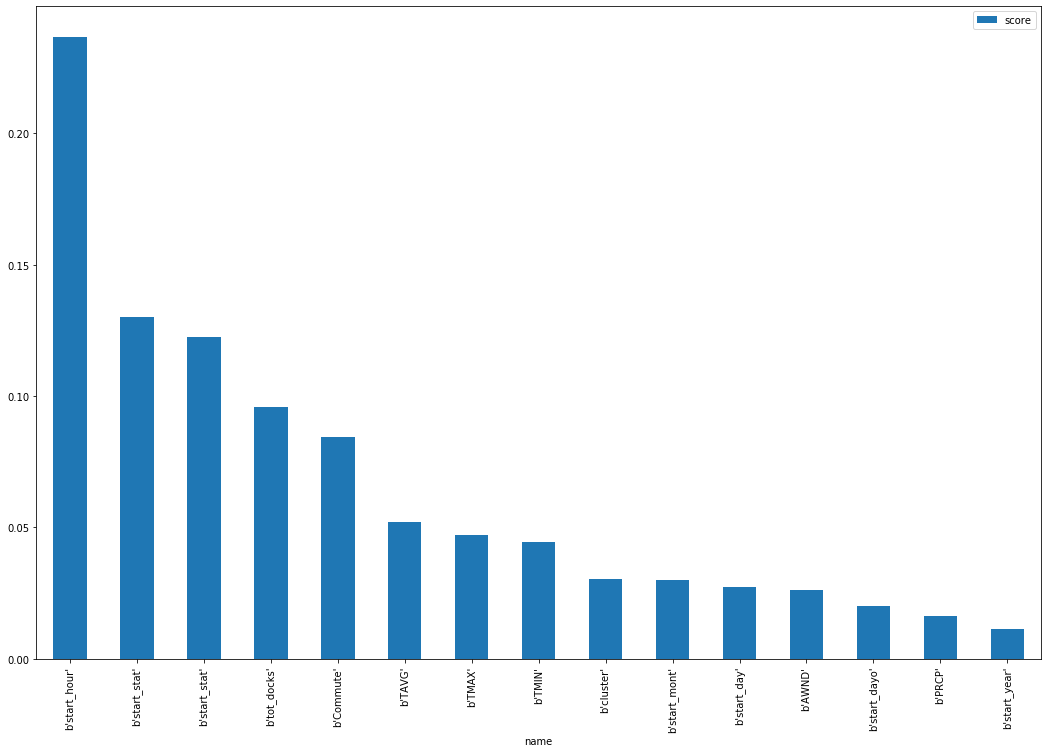

In [24]:
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')

In [ ]:
# grid_params = {'max_features':np,linspace(2,6,3),
#                'n_estimators':np.linspace(800,1200,5)}
# grid_search_randomForest = GridSearchCV(randomForest, grid_params, cv = 5)
# %time grid_search_randomForest.fit(X_train_class,y_train_class)